In [1]:
import torch
import nn

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model1 = nn.Model('resnet18', 200)
model = nn.Model(path='trained_models_dg8/dresnet18_1')
model = nn.Model(path='trained_models_dg16/dresnet18_1')
model2 = nn.Model('dresnet18', 200)
print()
model3 = nn.Model('psaresnet18', 200)
model = nn.Model(path='trained_models_dg8/psdresnet18_1')
model = nn.Model(path='trained_models_dg16/psdresnet18_1')
model5 = nn.Model('psdresnet18', 200)
print()
model3 = nn.Model('psaresnet18', 200)
model = nn.Model(path='trained_models_dg8/psadresnet18_1')
model = nn.Model(path='trained_models_dg16/psadresnet18_1')
model5 = nn.Model('psadresnet18', 200)
print()
model3 = nn.Model('psaresnet18', 200)
model = nn.Model(path='trained_models_dg8/psddresnet18_1')
model = nn.Model(path='trained_models_dg16/psddresnet18_1')
model5 = nn.Model('psddresnet18', 200)


Success to initialize resnet18 model
Total trainable parameters: 1,453,800
Success to load model from trained_models_dg8/dresnet18_1
Total trainable parameters: 1,459,960
Success to load model from trained_models_dg16/dresnet18_1
Total trainable parameters: 1,453,888
Success to initialize dresnet18 model
Total trainable parameters: 1,420,944

Success to initialize psaresnet18 model
Total trainable parameters: 1,703,528
Success to load model from trained_models_dg8/psdresnet18_1
Total trainable parameters: 1,727,472
Success to load model from trained_models_dg16/psdresnet18_1
Total trainable parameters: 1,711,952
Success to initialize psdresnet18 model
Total trainable parameters: 1,725,472

Success to initialize psaresnet18 model
Total trainable parameters: 1,703,528
Success to load model from trained_models_dg8/psadresnet18_1
Total trainable parameters: 1,709,688
Success to load model from trained_models_dg16/psadresnet18_1
Total trainable parameters: 1,703,616
Success to initialize ps

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = 'trained_models'
models = os.listdir(path)
stats = {name:{'recall':[], 'time':[], 'params':[]} for name in set([model.split('_')[0] for model in models])}

In [4]:
for model in models:
    with open(f'{path}/{model}/model.info', 'r') as f:
        text = f.read()

    for p, paragraph in enumerate(text.split('\n\n')):
        for line in paragraph.split('\n'):
            if ':' in line:
                k, v = line.split(':')
                k, v = k.strip(' '), v.strip(' ')
                if p == 0:
                    if k == 'model_name':
                        model_name = v
                    elif k == 'params':
                        stats[model_name]['params'] += [int(v)]
                
                elif p == 1:
                    pass

                elif p == 2:
                    if k == 'process_time':
                        stats[model_name]['time'] += [float(v)]
                    elif k == 'recall':
                        stats[model_name]['recall'] += [float(v)]


In [5]:
m_stats = {k:{kk:np.max(sorted(vv, reverse=True)[:]) for kk, vv in v.items()}for k, v in stats.items()}
m_stats

{'resnet18': {'recall': 0.4621, 'time': 0.00502068, 'params': 1453800},
 'psaresnet18': {'recall': 0.478, 'time': 0.00666793, 'params': 1703528},
 'psdresnet18': {'recall': 0.4853, 'time': 0.00765957, 'params': 1711952},
 'psadresnet18': {'recall': 0.4818, 'time': 0.00892806, 'params': 1703616},
 'psddresnet18': {'recall': 0.4967, 'time': 0.00886729, 'params': 1712040},
 'dresnet18': {'recall': 0.4727, 'time': 0.0065819, 'params': 1453888}}

In [6]:
def draw_bar(names_list, key='recall'):
    name_list = []
    x_list = []

    w = 0.35
    for i, names in enumerate(names_list):
        for j, name in enumerate(names):
            x = i + w * (j+0.5-len(names)/2)
            plt.bar(x, m_stats[name][key], w)
            name_list += [name[:-5]]
            x_list += [x]

    # plt.legend(ncols=2)
    plt.ylabel(key)
    # plt.xticks([i for i in range(len(names_list))], names_list)
    plt.xticks(x_list, name_list)
    if key == 'recall':
        plt.ylim(0.45, 0.5)
    elif key == 'time':
        plt.ylim(0.002, 0.004)
    elif key == 'params':
        plt.ylim(1440000, 1800000)
    plt.show()

In [7]:
model_names = [
               ['resnet18', 'dresnet18'], 
               ['psaresnet18', 'psdresnet18'],
               ['psadresnet18', 'psddresnet18'],
            #    ['dresnet18', 'psdresnet18', 'psadresnet18', 'psddresnet18'],
            #    ['dresnet182', 'psdresnet182', 'psadresnet182', 'psddresnet182']
               # ['resnet18', 'psaresnet18', 'psdresnet182', 'psddresnet182']
              ]

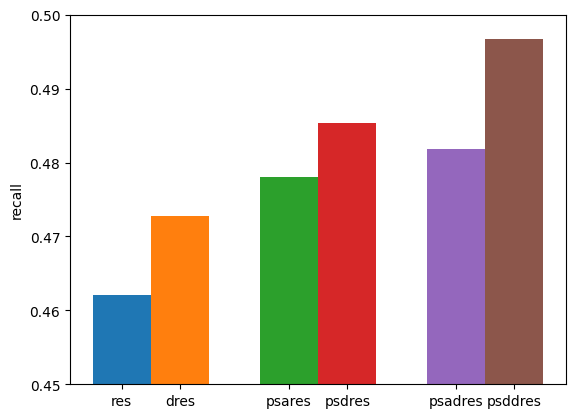

In [8]:
draw_bar(model_names, key='recall')

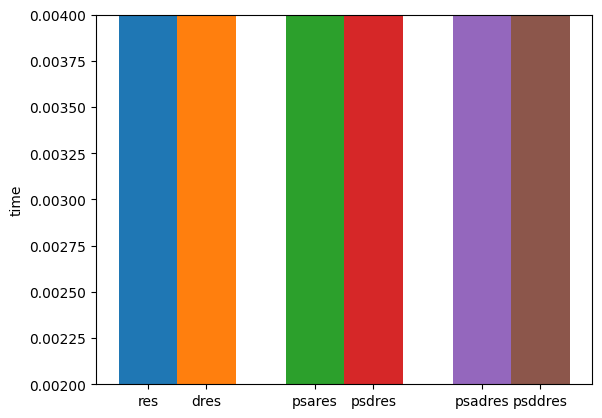

In [17]:
draw_bar(model_names, key='time')

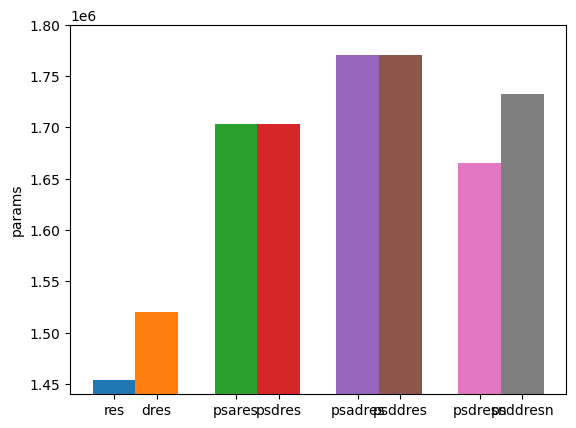

In [21]:
draw_bar(model_names, key='params')

In [ ]:
# psd는 그대로, dresnet은 dw_kernel_size를 3으로 바꿔서 해보자
# dw을 지우고 dcn의 projection 전 출력을 같은 크기의 1x1conv로 곱해서 modulate해보자
# 이거는 별론거 같고 차라리 dcn 밖에서 element-wise multiplication해보자
{'resnet18': {'recall': 0.4621, 'time': 0.00502068, 'params': 1453800},
 'psaresnet18': {'recall': 0.478, 'time': 0.00666793, 'params': 1703528},
 'psdresnet18': {'recall': 0.4853, 'time': 0.00765957, 'params': 1711952},
 'psadresnet18': {'recall': 0.4818, 'time': 0.00892806, 'params': 1703616},
 'psddresnet18': {'recall': 0.4967, 'time': 0.00886729, 'params': 1712040},
 'dresnet18': {'recall': 0.4727, 'time': 0.0065819, 'params': 1453888}}

In [9]:
import matplotlib.pyplot as plt
import numpy as np

resnet18 = {'param': 1.45, 'Acc': 46.2, 'process_time': 5.02} # 0.513
deco_resnet18 = {'param': 1.45, 'Acc': 47.3, 'process_time': 6.21} # 0.4830

psa_resnet18 = {'param': 1.70, 'Acc':47.8, 'process_time': 6.67} # 0.6064
psd_resnet18 = {'param': 1.71, 'Acc': 48.5, 'process_time': 7.22} # 0.6283

deco_psa_resnet18 = {'param': 1.70, 'Acc': 48.5, 'process_time': 8.38} # 0.528
deco_psd_resnet18 = {'param': 1.71, 'Acc': 49.7, 'process_time': 8.32} # 0.579

ic_models = {'Resnet18': resnet18, 'DeCo-Resnet18': deco_resnet18,
          'PSA-Resnet18': psa_resnet18, 'PSD-Resnet18': psd_resnet18,
          'DeCo-PSA-Resnet18': deco_psa_resnet18, 'DeCo-PSD-Resnet18': deco_psd_resnet18}

ic_colors = ['#ff9999', '#ff9999',
          '#99ff99', '#99ff99',
          '#9999ff', '#9999ff']


yolo8n = {'param': 3.15, 'mAP': 37.4, 'process_time': 0.89} # 0.513
deco_yolo8n = {'param': 2.73, 'mAP': 37.9, 'process_time': 0.83} # 0.4830

yolo10n = {'param': 2.78, 'mAP':38.5, 'process_time': 0.70} # 0.6064
deco_yolo10n = {'param': 2.81, 'mAP': 39.1, 'process_time': 0.73} # 0.6283
psd_yolo10n = {'param': 2.71, 'mAP': 38.2, 'process_time': 0.71} # 0.6133
deco_psd_yolo10n = {'param': 2.85, 'mAP': 38.3, 'process_time': 0.77}

yolo11n = {'param': 2.62, 'mAP': 39.4, 'process_time': 0.87} # 0.528
deco_yolo11n = {'param': 2.67, 'mAP': 38.8, 'process_time': 0.94} # 0.579
c2psd_yolo11n = {'param': 2.66, 'mAP': 38.3, 'process_time': 0.90} # 0.533
deco_c2psd_yolo11n = {'param': 2.69, 'mAP': 38.1, 'process_time': 1.02} # 0.593

od_models = {'yolo8n': yolo8n, 'deco-yolo8n': deco_yolo8n,
          'yolo10n': yolo10n, 'deco-yolo10n': deco_yolo10n, 'psd-yolo10n': psd_yolo10n,'deco-psd-yolo10n': deco_psd_yolo10n,
          'yolo11n': yolo11n, 'deco-yolo11n': deco_yolo11n, 'c2psd-yolo11n': c2psd_yolo11n, 'deco-c2psd-yolo11n': deco_c2psd_yolo11n}

od_colors = ['#ff9999', '#ff9999',
          '#99ff99', '#99ff99', '#99ff99', '#99ff99',
          '#9999ff', '#9999ff', '#9999ff', '#9999ff']

# 데이터 추출
def graph(models, colors, xlim=None, ylim=None, metric='mAP'):
    names = list(models.keys())
    params = [models[name]['param'] for name in names]
    metrics = [models[name][metric] for name in names]
    process_times = [models[name]['process_time'] for name in names]

    # 버블 크기 설정 (더 크게 조정)
    bubble_sizes = np.array(params) * 500

    # 색상 설정 (2개씩 같은 색상)

    colors = colors[:len(names)]  # 데이터 개수만큼 자르기

    plt.figure(figsize=(10, 7))
    for i in range(len(names)):
        plt.scatter(process_times[i], metrics[i], s=bubble_sizes[i],
                color=colors[i], alpha=0.6,)# edgecolors="white")
        plt.text(process_times[i], metrics[i], names[i],
                fontsize=10, ha='right', va='bottom')

    if ylim:
        plt.ylim(ylim)
    if xlim:
        plt.xlim(xlim)
    plt.xlabel('Process time (ms)')
    if metric == 'mAP':
        plt.ylabel('CoCo mAP')
    elif metric == 'Acc':
        plt.ylabel('Tiny-imagenet Accuracy')
    plt.title('Model Performance Comparison')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.show()

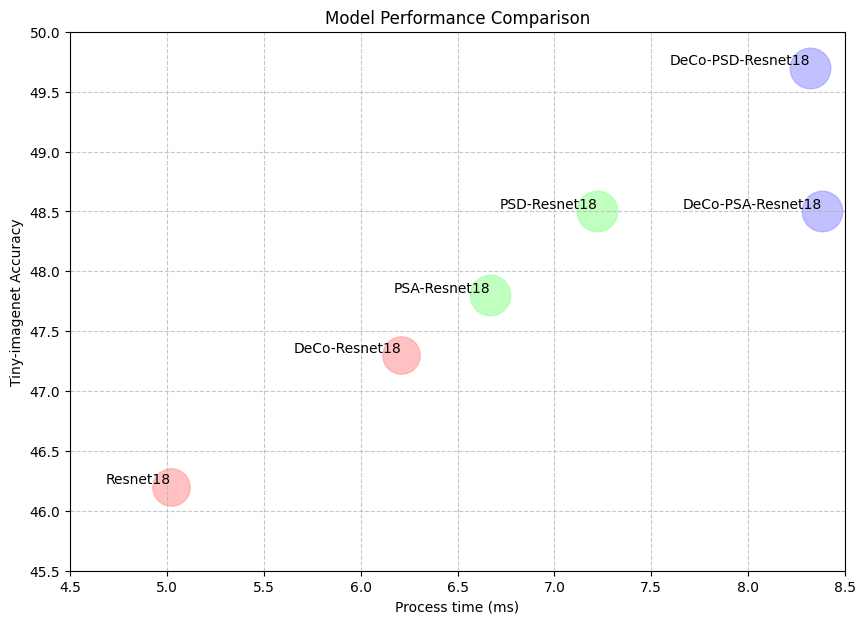

In [10]:
graph(ic_models, ic_colors, metric='Acc', xlim=[4.5, 8.5], ylim=[45.5, 50])

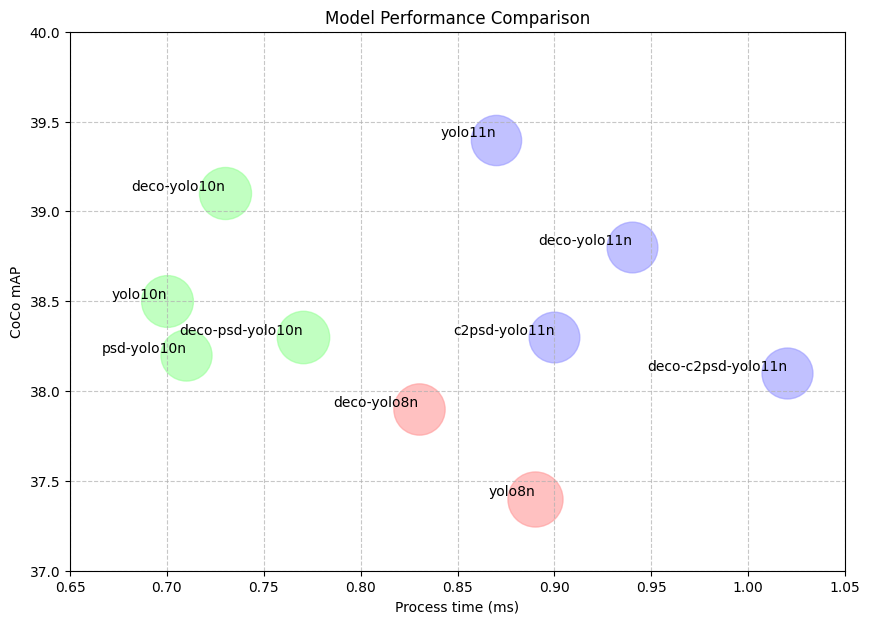

In [31]:
graph(od_models, od_colors, metric='mAP', xlim=[0.65, 1.05], ylim=[37, 40])